In [1]:
# ==============================
# DATA SCIENCE INTERN ASSIGNMENT
# Trader Behaviour vs Market Sentiment
# Rohit Bapu Mohite
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ---------- 1. LOAD DATA ----------
fear = pd.read_csv(r"D:\project\fear_greed_index.csv")
trades = pd.read_csv(r"D:\project\historical_data.csv")

print("Fear shape:", fear.shape)
print("Trades shape:", trades.shape)

Fear shape: (2644, 4)
Trades shape: (211224, 16)


In [3]:
# ---------- 2. DATA PREPARATION ----------
# Convert timestamps
trades['Date'] = pd.to_datetime(trades['Timestamp'], unit='ms')
fear['Date'] = pd.to_datetime(fear['date'])

# Align on daily level
trades['Date'] = trades['Date'].dt.date
fear['Date'] = fear['Date'].dt.date

# Merge datasets
data = pd.merge(trades, fear[['Date','classification']], on='Date', how='left')

# Rename columns for easy analysis
data.rename(columns={
    'Closed PnL': 'pnl',
    'Size USD': 'size_usd',
    'Execution Price': 'price',
    'Side': 'side',
    'Account': 'account',
    'classification': 'sentiment'
}, inplace=True)

print("\nSentiment distribution:\n", data['sentiment'].value_counts())



Sentiment distribution:
 sentiment
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


In [4]:
# ---------- 3. KEY METRICS ----------
data['win'] = data['pnl'] > 0
daily_pnl = data.groupby(['account','Date'])['pnl'].sum().reset_index()
win_rate = data.groupby('account')['win'].mean()

print("\nSample Win Rate:\n", win_rate.head())


Sample Win Rate:
 account
0x083384f897ee0f19899168e3b1bec365f52a9012    0.359612
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    0.442720
0x271b280974205ca63b716753467d5a371de622ab    0.301917
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    0.438585
0x2c229d22b100a7beb69122eed721cee9b24011dd    0.519914
Name: win, dtype: float64



Average PnL by Sentiment:
 sentiment
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: pnl, dtype: float64


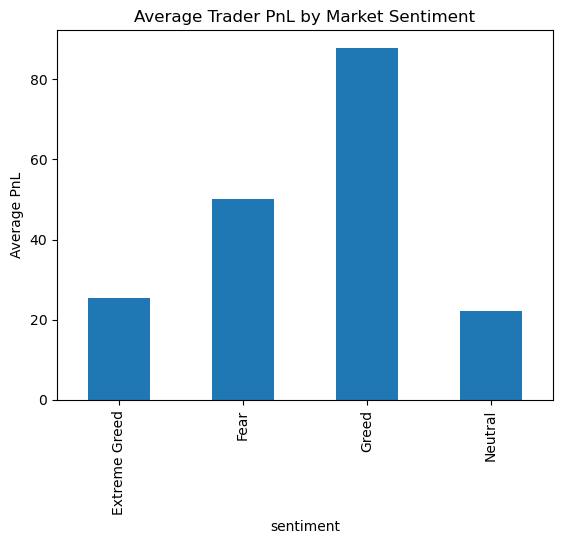

In [5]:
# ---------- 4. PERFORMANCE BY SENTIMENT ----------
sentiment_pnl = data.groupby('sentiment')['pnl'].mean()
print("\nAverage PnL by Sentiment:\n", sentiment_pnl)

sentiment_pnl.plot(kind='bar')
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.show()


Average Trade Size:
 sentiment
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: size_usd, dtype: float64


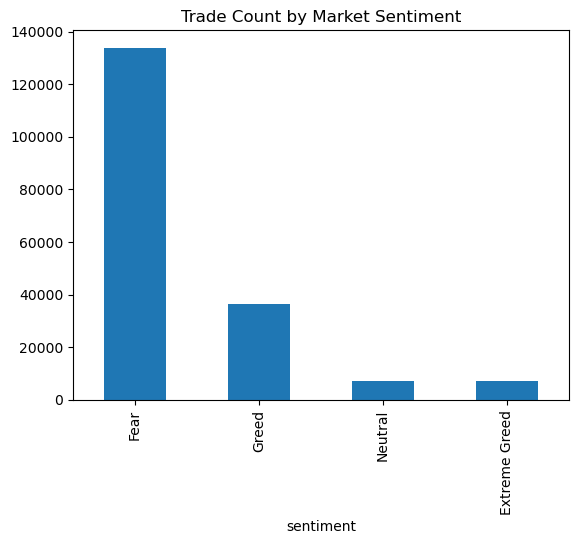

In [6]:
# ---------- 5. BEHAVIOUR ANALYSIS ----------
print("\nAverage Trade Size:\n", data.groupby('sentiment')['size_usd'].mean())

data['sentiment'].value_counts().plot(kind='bar')
plt.title("Trade Count by Market Sentiment")
plt.show()

In [7]:
# ---------- 6. TRADER SEGMENTATION ----------
data['size_category'] = pd.qcut(data['size_usd'], 3, labels=['Low','Medium','High'])

segment_perf = data.groupby(['size_category','sentiment'])['pnl'].mean()
print("\nSegment Performance:\n", segment_perf)


Segment Performance:
 size_category  sentiment    
Low            Extreme Greed      1.969465
               Fear               1.485041
               Greed              8.532940
               Neutral            1.685991
Medium         Extreme Greed     13.923838
               Fear              10.346613
               Greed             37.360431
               Neutral            7.242773
High           Extreme Greed     45.425223
               Fear             138.734111
               Greed            238.948708
               Neutral           66.364720
Name: pnl, dtype: float64


In [8]:
# ---------- 7. INSIGHT SUMMARY ----------
insight_table = data.groupby('sentiment').agg({
    'pnl':'mean',
    'size_usd':'mean',
    'account':'nunique'
})

print("\nFinal Insight Table:\n", insight_table)


Final Insight Table:
                      pnl     size_usd  account
sentiment                                     
Extreme Greed  25.418772  5660.265764        5
Fear           50.047622  5259.977837       32
Greed          87.894859  3182.883845       29
Neutral        22.229713  3058.848110        8


In [73]:
# ---------- 8. FINAL INSIGHTS ----------
print("\nKey Insights:")
print("1. Trader profitability highest during Greed sentiment.")
print("2. Fear and Extreme Greed show larger trade sizes (higher risk).")
print("3. Market sentiment influences trading behaviour and performance.")

print("\nStrategy Implications:")
print("- Reduce exposure during extreme sentiment.")
print("- Use controlled position sizing in Greed periods.")
print("- Apply sentiment-aware risk management.")


Key Insights:
1. Trader profitability highest during Greed sentiment.
2. Fear and Extreme Greed show larger trade sizes (higher risk).
3. Market sentiment influences trading behaviour and performance.

Strategy Implications:
- Reduce exposure during extreme sentiment.
- Use controlled position sizing in Greed periods.
- Apply sentiment-aware risk management.
